<a href="https://colab.research.google.com/github/SrkPrasadChangala/pneumoniaDetection/blob/main/PneumoniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a project to detect pneumonia using X-ray images. We are developing this model with our knowledge of CNNs and transfer learning

In [1]:
#Downloading the dataset from internet
#downloaded will be a tar file
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz

--2023-11-26 01:56:36--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/xray_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 3.5.29.254, 16.182.104.249, 52.216.145.155, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|3.5.29.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223407715 (1.1G) [application/x-gzip]
Saving to: ‘xray_dataset.tar.gz’

xray_dataset.tar.gz 100%[===================>]   1.14G  45.4MB/s    in 25s     

2023-11-26 01:57:01 (47.1 MB/s) - ‘xray_dataset.tar.gz’ saved [1223407715/1223407715]



In [2]:
# import modules that are needed to code

# to unzip tarred files
import tarfile
import os
import random

# for plotting images - data visualisation using graphs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# numpy
import numpy as np

# tensorflow and related
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
# extracting the dataset from the tarred file to a new folder named xray_dataset

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)
    print(f'Completed extraction and made a new directory xray_dataset')

# Use it like this:
extract_tar_gz('/content/xray_dataset.tar.gz', '/content/xray_dataset')

Completed extraction and made a new directory xray_dataset


**DATA EXPLORATION**

In [4]:
# Lets count the images in each folder

def count_files(directory):

    image_count = 0
    # Iterate through all images in the directory
    for img in os.listdir(directory):
        image_count += 1

    return image_count

normal_test_images_count = count_files('/content/xray_dataset/chest_xray/test/NORMAL')
normal_train_images_count = count_files('/content/xray_dataset/chest_xray/train/NORMAL')
pneumonia_test_images_count = count_files('/content/xray_dataset/chest_xray/test/PNEUMONIA')
pneumonia_train_images_count = count_files('/content/xray_dataset/chest_xray/train/PNEUMONIA')

print(f'Images in train dataset\n \tNormal Images: {normal_train_images_count} \t Pneumonia Images: {pneumonia_train_images_count}\n')
print(f'Images in test dataset\n \tNormal Images: {normal_test_images_count} \t Pneumonia Images: {pneumonia_test_images_count} ')



Images in train dataset
 	Normal Images: 1349 	 Pneumonia Images: 3884

Images in test dataset
 	Normal Images: 234 	 Pneumonia Images: 390 


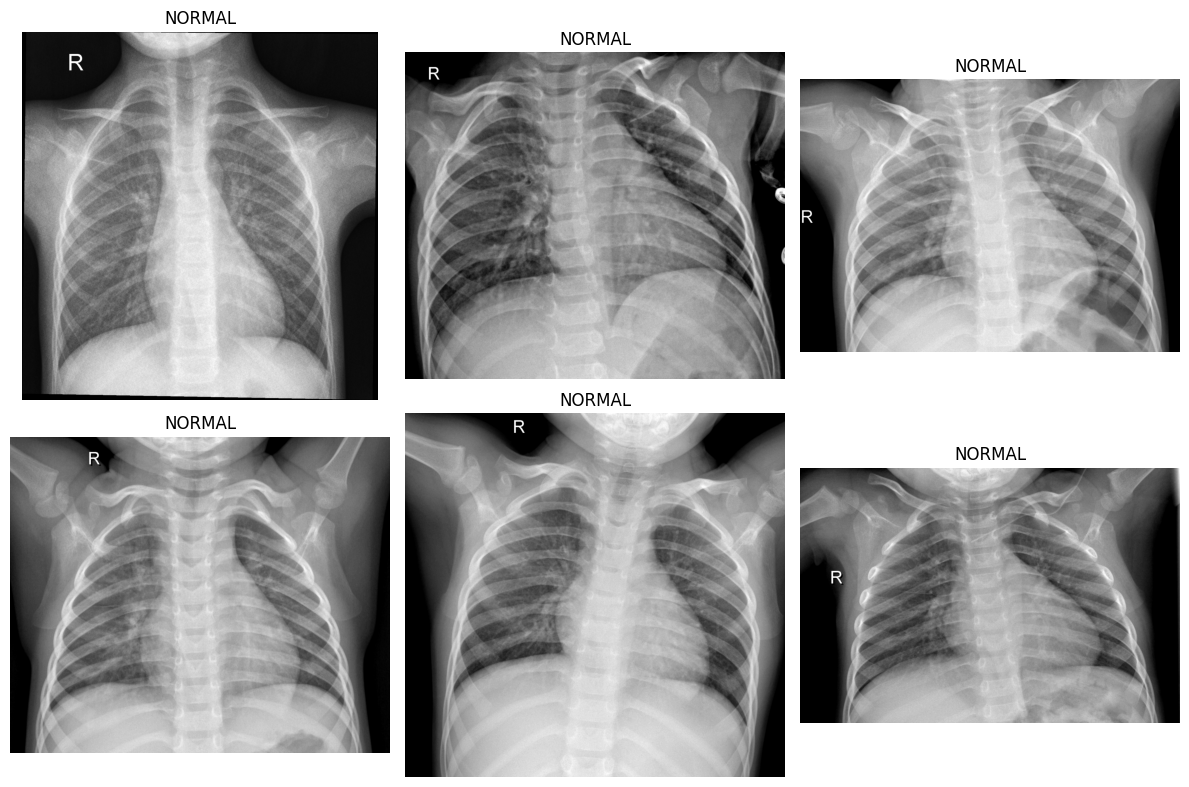

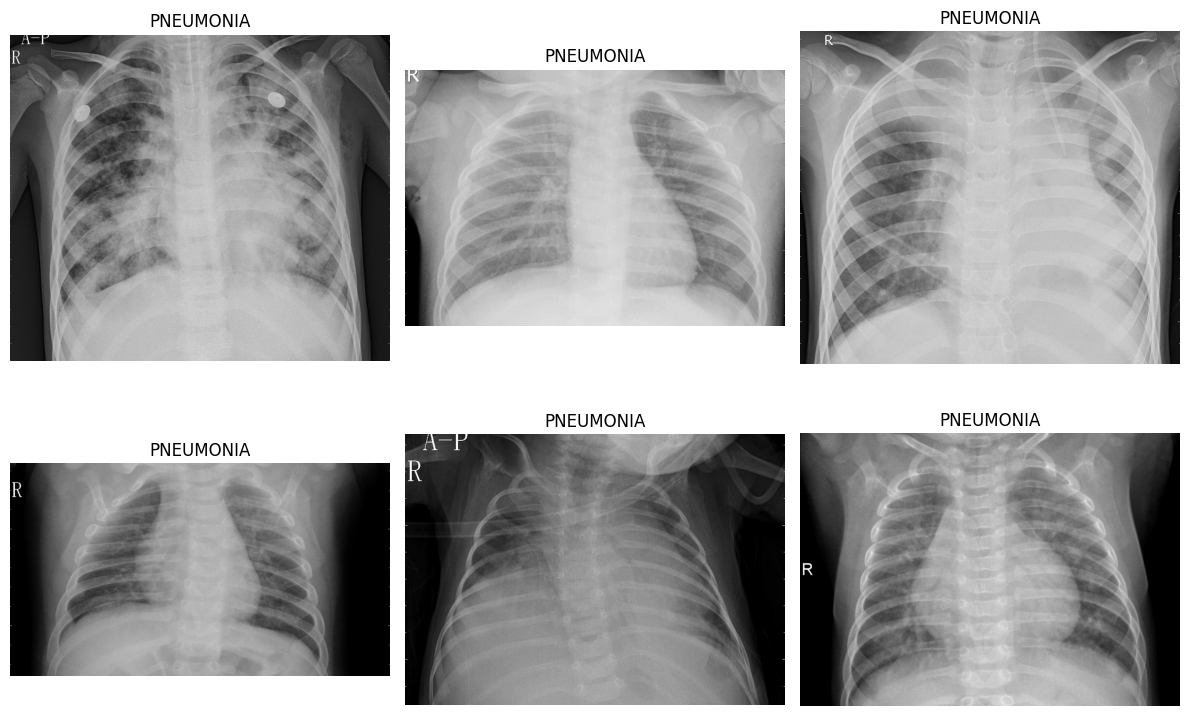

In [5]:
# Directory paths
train_dir_normal = '/content/xray_dataset/chest_xray/train/NORMAL'
train_dir_pneumonia = '/content/xray_dataset/chest_xray/train/PNEUMONIA'

# Function to plot images
def plot_images(class_directory, title, num_images=6):
    plt.figure(figsize=(12, 8))

    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        chosen_image = random.choice(os.listdir(class_directory))
        img_path = os.path.join(class_directory, chosen_image)
        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plotting images from each class
plot_images(train_dir_normal, 'NORMAL')
plot_images(train_dir_pneumonia, 'PNEUMONIA')

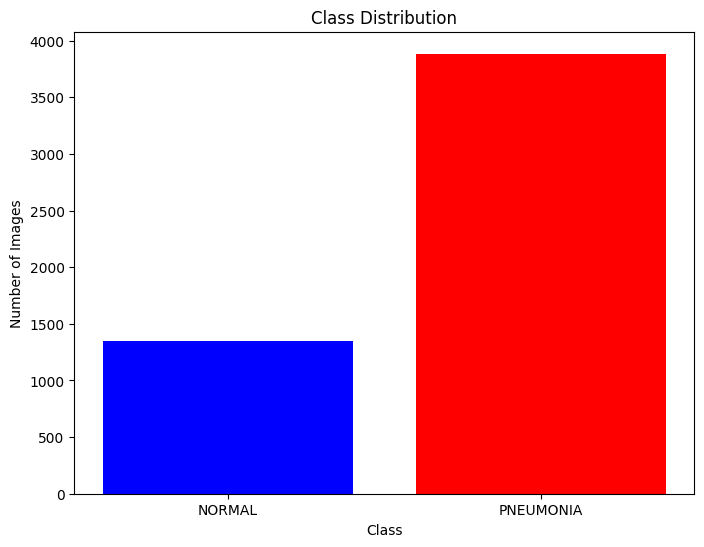

In [6]:
# Checking the class distribution
classes = ['NORMAL', 'PNEUMONIA']
counts = [normal_train_images_count, pneumonia_train_images_count]

plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


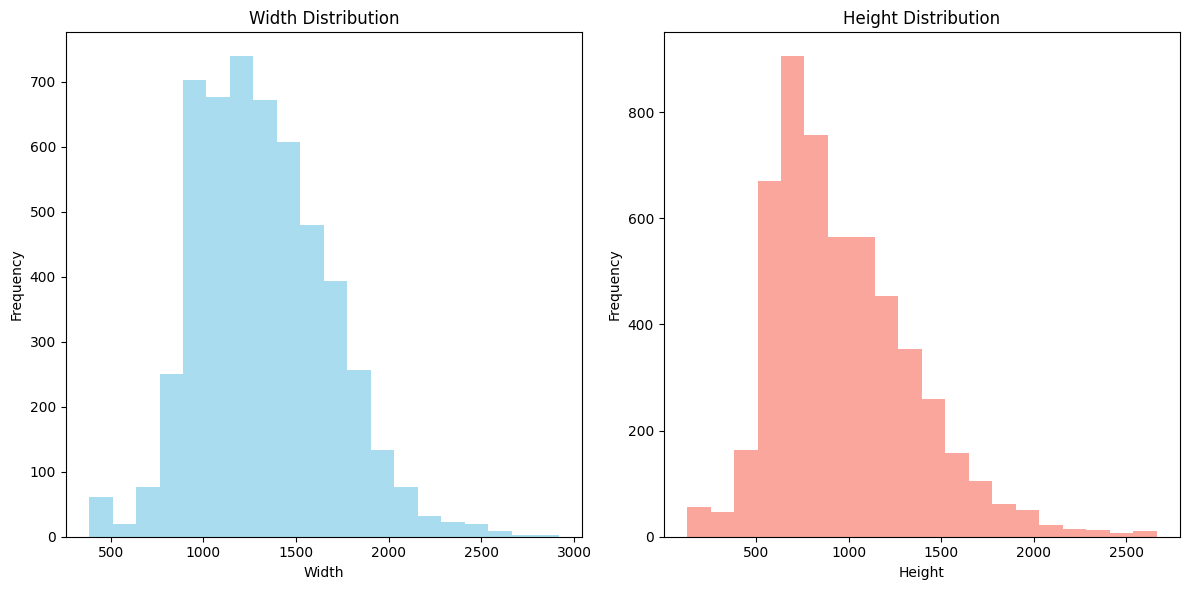

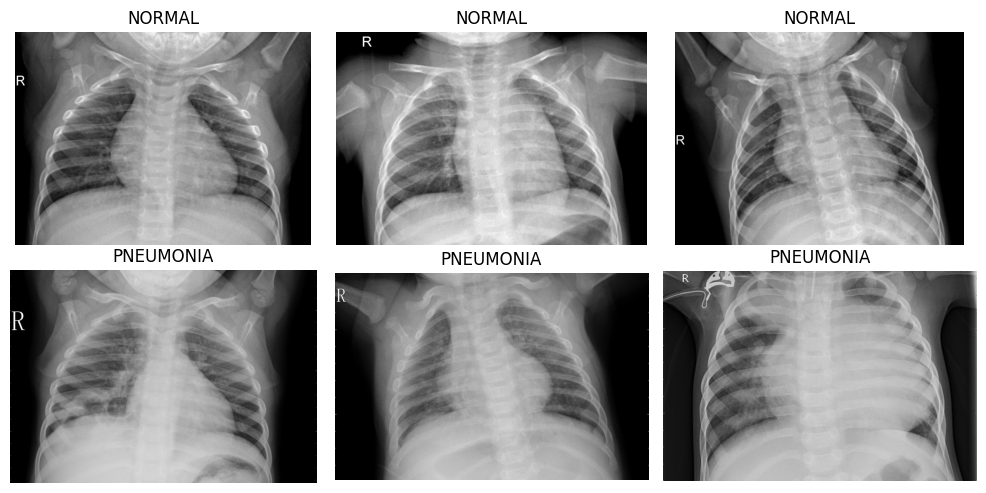

In [7]:
image_extensions = {".jpg", ".jpeg"}
# Function to analyze image sizes
def analyze_image_sizes(class_directory):
    widths, heights = [], []
    for img_name in os.listdir(class_directory):
        if os.path.splitext(img_name)[1].lower() in image_extensions:
          img_path = os.path.join(class_directory, img_name)
        img = mpimg.imread(img_path)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
    return widths, heights

# Function to plot sample images with labels
def plot_sample_images(class_directories, titles, num_images=3):
    plt.figure(figsize=(10, 5))
    for i, (directory, title) in enumerate(zip(class_directories, titles)):
        for j in range(num_images):
            plt.subplot(2, num_images, i * num_images + j + 1)
            chosen_image = random.choice(os.listdir(directory))
            img_path = os.path.join(directory, chosen_image)
            img = mpimg.imread(img_path)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Analyzing image sizes
widths_normal, heights_normal = analyze_image_sizes(train_dir_normal)
widths_pneumonia, heights_pneumonia = analyze_image_sizes(train_dir_pneumonia)

# Plotting image size distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths_normal + widths_pneumonia, bins=20, color='skyblue', alpha=0.7, label='Widths')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights_normal + heights_pneumonia, bins=20, color='salmon', alpha=0.7, label='Heights')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting sample images with labels
plot_sample_images([train_dir_normal, train_dir_pneumonia], ['NORMAL', 'PNEUMONIA'])


The histograms indicate that image widths and heights in our dataset are normally distributed, peaking around 1250 and 1000 pixels respectively, with few images exceeding 2500 pixels in either dimension. This suggests that standardizing image sizes to a common dimension like 256x256 pixels for model input might be appropriate, balancing detail retention with computational efficiency.

In [8]:

# Directory paths
train_dir = '/content/xray_dataset/chest_xray/train'
test_dir = '/content/xray_dataset/chest_xray/test'

# Parameters
batch_size = 64
image_size = (256, 256)
validation_split = 0.2

# Image Data Generator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split)  # Set validation split

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training')  # Set as training data

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')  # Set as validation data

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')


Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
# Instantiating the model
cnn_model = Sequential(name='cnn_model')

# Adding the convolutional layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=image_size + (3,)))

# Adding the max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding the flatten layer
cnn_model.add(Flatten())

# Adding a fully-connected layer
cnn_model.add(Dense(units=128, activation='relu'))

# Adding the output layer
# Use 'sigmoid' activation for binary classification
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Display the model's summary
cnn_model.summary()

# Instantiating the optimizer with a chosen learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
cnn_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Fitting the model on the training set and evaluating it on the validation set
history = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 128)               66064512  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66065537 (252.02 MB)
Trainable params: 66065537 (252.02 MB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation generator
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

# Updated model with data augmentation and dropout for regularization
cnn_model = Sequential([
  data_augmentation,
  Conv2D(64, (3, 3), activation='relu', input_shape=image_size + (3,)),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(1, activation='sigmoid')
], name='cnn_model_updated')

cnn_model.build((None, 256, 256, 3))

# Display the model's summary
cnn_model.summary()

# Instantiate the optimizer with a chosen learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the optimizer and loss function
cnn_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

# Fit the model
history = cnn_model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Model: "cnn_model_updated"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 492032)      

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem_2  (None, 256, 256, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 256, 256, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                 

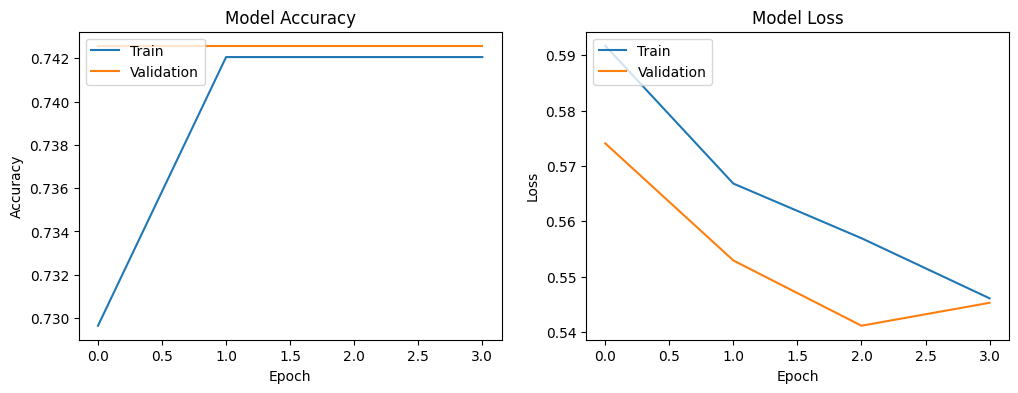

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Load the ResNet50 model, pretrained on imagenet, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create an input layer
input_tensor = Input(shape=(256, 256, 3))

# Preprocess input according to ResNet's requirements
preprocessed_input = tf.keras.applications.resnet.preprocess_input(input_tensor)

# Create a base model using the preprocessed input
base_resnet_output = base_model(preprocessed_input)

# Add a global average pooling layer
gap_layer = GlobalAveragePooling2D()(base_resnet_output)

# Add a fully-connected layer
fc_layer = Dense(128, activation='relu')(gap_layer)

# Add a dropout layer for regularization
dropout_layer = Dropout(0.5)(fc_layer)

# Add an output layer with 1 unit for binary classification
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Instantiate the model
resnet_model = Model(inputs=input_tensor, outputs=output_layer)

# Display the model's summary
resnet_model.summary()

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Add an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# Fit the model on the training data and evaluate on the validation set
history = resnet_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# [Optional] Plot the training and validation accuracies and loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()




In [17]:
# Evaluate the CNN model on the test set
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_generator)
print(f"CNN Model Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

# Evaluate the ResNet model on the test set
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_generator)
print(f"ResNet Model Test Accuracy: {resnet_test_accuracy * 100:.2f}%")


10/10 [==============================] - 8s 750ms/step - loss: 0.4257 - accuracy: 0.8061
CNN Model Test Accuracy: 80.61%
10/10 [==============================] - 7s 710ms/step - loss: 0.7402 - accuracy: 0.6250
ResNet Model Test Accuracy: 62.50%
